<a href="https://colab.research.google.com/github/edmondjonathan02/TSF-GRIP_DS-BA/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION - GRIP**
# ***DATA SCIENCE & BUSINESS DATA ANAYTICS***
**Author - Edmond Jonathan Jeremiah**<br>
**Task - Exploratory Data Analysis - Retail**<br>
Problem Statement: As a business manager , we are required to find out the areas where you can work to make more profit.



# Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Analysis on the given Data set
Reading and importing the data


In [20]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Getting the Shape of the data set

In [22]:
print(df.shape)

(9994, 13)


Checking for null values (if present)

In [23]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Checking for duplicates and dropping if found

In [24]:
df.duplicated().sum()

17

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.drop(['Postal Code'] , axis = 1 , inplace = True)

Viewing Columns:

In [27]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Information about the data set

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


# Data Visualization

Correlation between the data

In [29]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


We can understand this correlation in a better manner using a heatmap

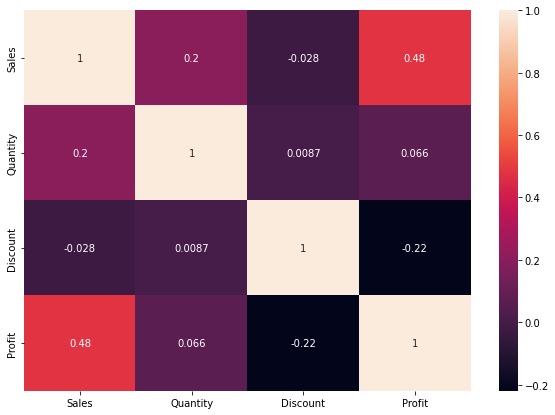

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr() , annot = True)
plt.show()

Visualising the various subcategories of the dataset

1. Ship Mode

In [31]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

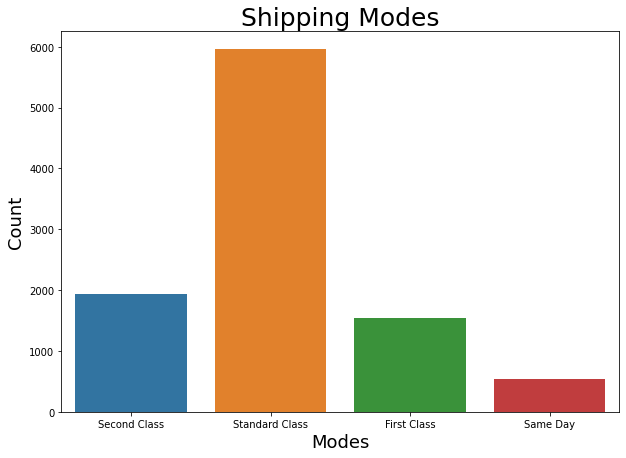

In [33]:
plt.figure(figsize = (10,7))
sns.countplot(df['Ship Mode'])
plt.title('Shipping Modes' , fontsize = 25)
plt.xlabel('Modes',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.show()

Inference: Most preffered mode of shipping is **Standard Class**

2. Segment

In [34]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

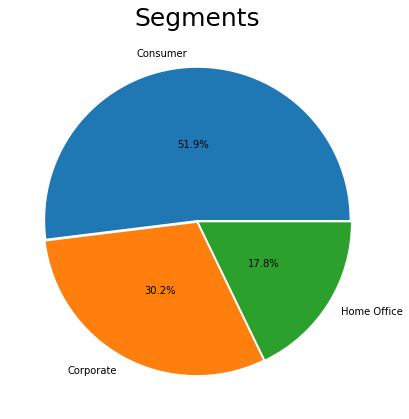

In [39]:
plt.figure(figsize = (10,7))
plt.pie(df['Segment'].value_counts() ,labels = df['Segment'].value_counts().index , 
        explode = [0.01]*3 , pctdistance = 0.5 , autopct = '%.1f%%' )
plt.title('Segments',fontsize = 25)
plt.show() #We are using pie chart to visualise the percentages

Inference: **Consumer** is the most preffered Segment

3. Categories

In [41]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

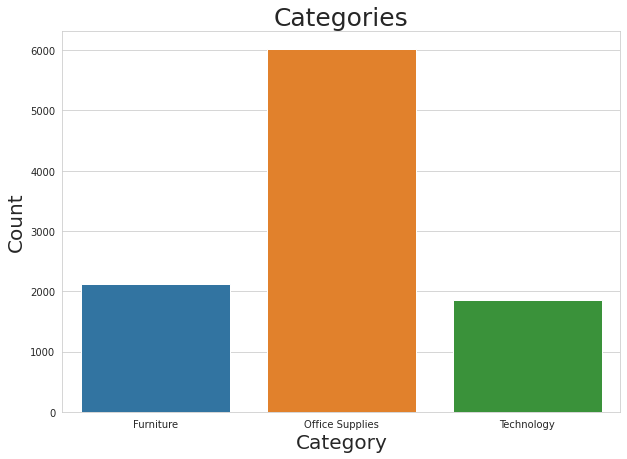

In [43]:
plt.figure(figsize = (10,7))
sns.countplot(df['Category'])
plt.title('Categories' , fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Inferance: Most preffered category is **Office Supplies**

4. Sub-categories

In [44]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

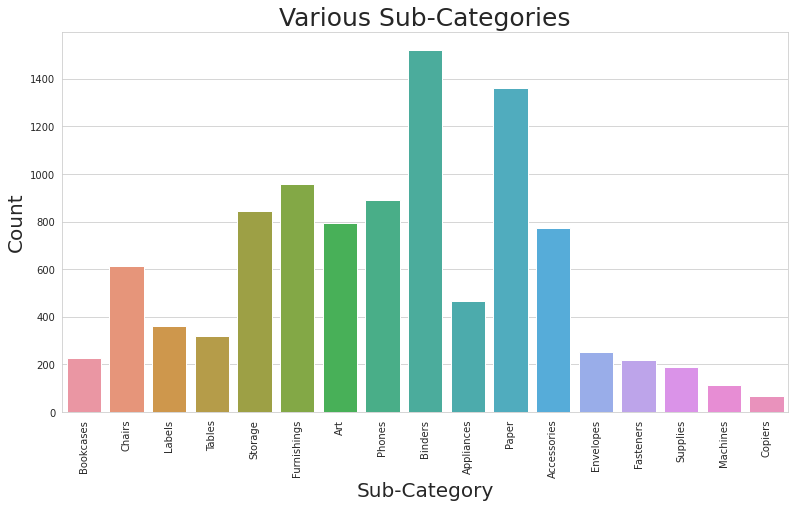

In [46]:
plt.figure(figsize = (13,7))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation = 90)
plt.title('Various Sub-Categories' , fontsize = 25)
plt.xlabel('Sub-Category',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Inferance: **Binders** are the most demanded office supply

5. States

In [47]:
df['State'].value_counts()


California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

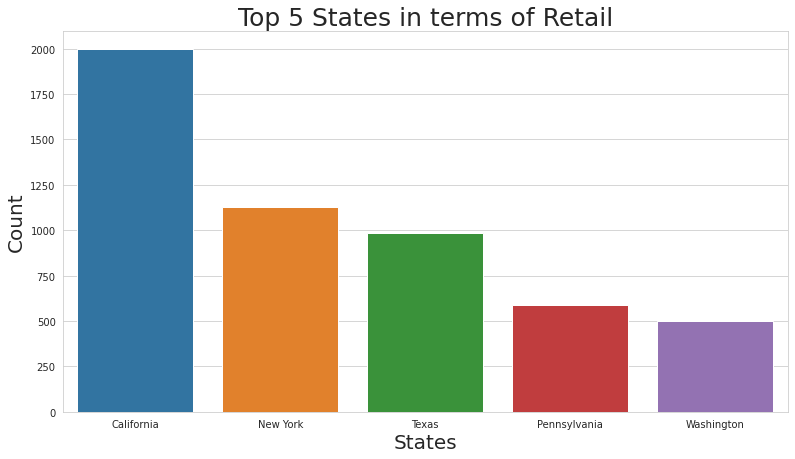

In [52]:
plt.figure(figsize=(13,7))
state = df['State'].value_counts().reset_index()
state.columns = ['State','count']
sns.barplot(x = 'State',y = 'count', data = state[:5])
plt.title('Top 5 States in terms of Retail', fontsize = 25)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation=0)
plt.show()

Inferance: **California** has the maximum retail

6. City

In [50]:
df['City'].value_counts()

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Vacaville          1
Bartlett           1
Chapel Hill        1
Linden             1
Norfolk            1
Name: City, Length: 531, dtype: int64

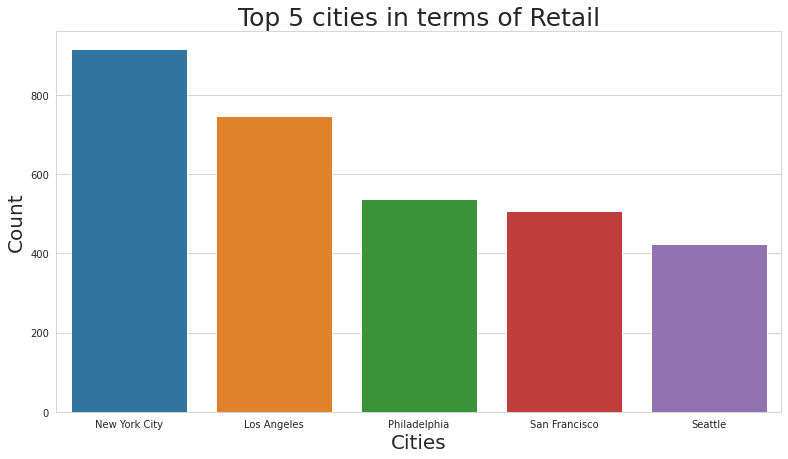

In [53]:
plt.figure(figsize=(13,7))
state = df['City'].value_counts().reset_index()
state.columns = ['City','count']
sns.barplot(x = 'City',y = 'count', data = state[:5])
plt.title('Top 5 cities in terms of Retail', fontsize = 25)
plt.xlabel('Cities', fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation=0)
plt.show()

Inferance: **New York City** has the maximum retail

7. Region

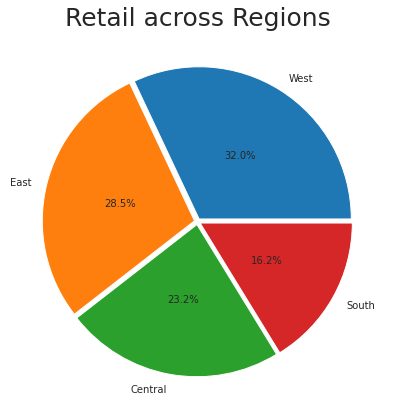

In [54]:
plt.figure(figsize = (10,7))
plt.pie(df['Region'].value_counts() ,labels = df['Region'].value_counts().index  , 
        explode = [0.02]*4 , pctdistance = 0.5 , autopct = '%.1f%%' )
plt.title('Retail across Regions',fontsize = 25)
plt.show()

Inferance: Maximum retail occured in the **West**

Discount Vs Profit

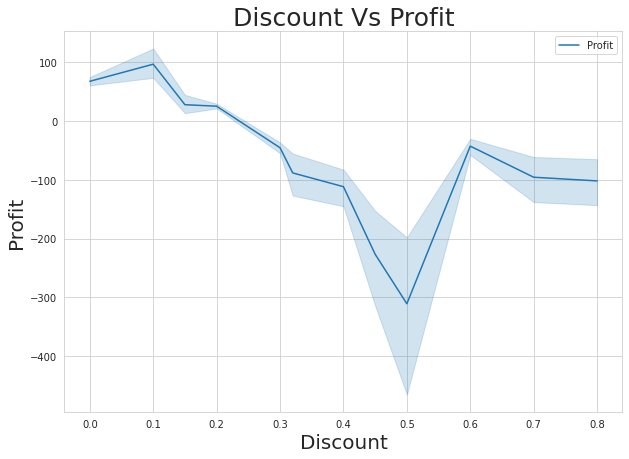

In [55]:
plt.figure(figsize = (10,7))
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.title('Discount Vs Profit',fontsize = 25)
plt.xlabel('Discount',fontsize = 20)
plt.ylabel('Profit',fontsize = 20)
plt.show()

Inferance:  Discount has a negative relation with Profit

Sales vs Profit - Regionwise

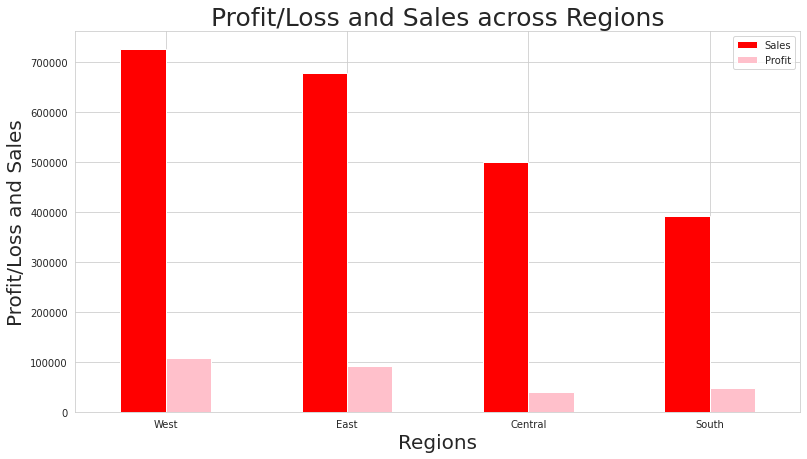

In [59]:
sp = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sp[:].plot.bar(color=['red','pink'] , figsize =(13,7))
plt.title('Profit/Loss and Sales across Regions',fontsize = 25)
plt.xlabel('Regions',fontsize = 20)
plt.ylabel('Profit/Loss and Sales',fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Inferance: Maximum **Sales & Profit** is seen in the **West**

Sales vs Profit - Statewise

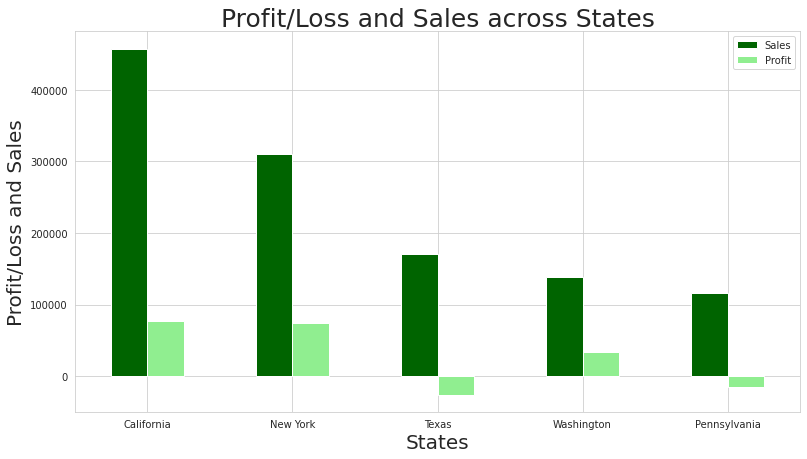

In [60]:
sp = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sp[:5].plot.bar(color=['darkgreen','lightgreen'] , figsize =(13,7))
plt.title('Profit/Loss and Sales across States',fontsize = 25)
plt.xlabel('States',fontsize = 20)
plt.ylabel('Profit/Loss and Sales',fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Inferance: **California** has the maximum Profit and Sales

Sales vs Profit - Citywise

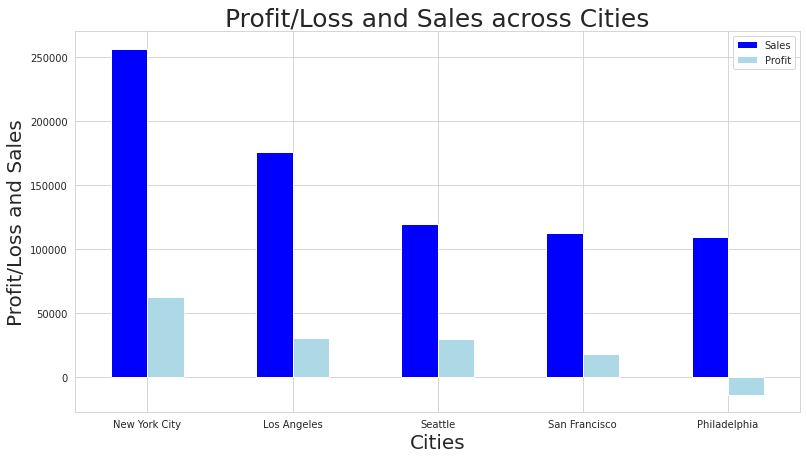

In [61]:
sp = df.groupby('City')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sp[:5].plot.bar(color=['blue','lightblue'] , figsize =(13,7))
plt.title('Profit/Loss and Sales across Cities',fontsize = 25)
plt.xlabel('Cities',fontsize = 20)
plt.ylabel('Profit/Loss and Sales',fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Inferance: **New York City** has maximum Sales and Profit

# Conclusions


1. Most preferred shipping mode : **Standard Class**
2. Most preferred segment : **Consumer**
3. Most Demanded Category : **Office Supplies**
4. Most Demanded Sub Category : **Binders**
5. Maximum retail over regions : **West**
6. State with maximum retail : **California**
7. City with maximum retail : **New York City**

We arrive to the conclusion that, 
* First and foremost, we need to focus more on California and New York City, as these are the states with the highest sales volume.

* Second, in order to improve sales, the discount in the southern areas must be reduced. 

* Finally, while the profit created by office supplies is higher, the sales are lower, so we must concentrate on that as well.

# **Thank You!**